# Derivación numérica

Aunque la derivada de una función se puede obtener algorítmicamente de manera analítica, los algoritmos numéricos que usemos pueden depender de muchas derivadas o no pueden acceder a otra cosa más que la función original.

Así, comúnmente utilizaremos una aproximación numérica de la derivada en lugar de el valor real.

## Preludio matemático: series de Taylor

Sea $f:\mathbb{R} \to \mathbb{R}$ diferenciable $k$ veces en un punto $a$. Entonces :

$$
f(x) = f(a) + f'(a)(x-a)+ \frac{f''(a)}{2!} (x-a)^2 + \ldots + \frac{f^{(k)}(a)}{k!}(x-a)^k + R_{k}(x)
$$

Y $R_{k}(x)$ cumple que

\begin{equation}
\lim_{x\to a} \frac{R_{k}(x)}{(x-a)^k} = 0 \quad \left( R_k(x) \sim (x-a)^{k+1}\right)
\label{eq1}
\end{equation}

En forma aproximada, se cumple que:
$$
f(x) \approx f(a) + f'(a)(x-a)+ \frac{f''(a)}{2!} (x-a)^2 + \ldots + \frac{f^{(k)}(a)}{k!}(x-a)^k
$$

### Forma explícita de $R_k(x)$

Utilizando el teorema del punto medio, podemos expresar a $R_k(x)$ como

$$
R_k(x) = \frac{f^{(k+1)}(\xi)}{(k+1)!} (x-a)^{k+1}
$$

Con $\xi$ un número real **fijo** entre $x$ y $a$. Con esta expresión, es claro que se la condición de $\lim_{x\to a} \frac{R_{k}(x)}{(x-a)^k} = 0 $ se cumple.

### Reescribir el teorema:

Sustitución: $x-a = h \implies x = a+h$

$$
f(a+h) = f(a) + f'(a)(h)+ \frac{f''(a)}{2!} (h)^2 + \ldots + \frac{f^{(k)}(a)}{k!}(h)^k + R_{k}(a+h)
$$

Y $R_{k}(a+h)$ cumple que

$$
\lim_{h\to 0} \frac{R_{k}(a+h)}{h^k} = 0 \quad \left( R_k(a+h) \sim h^{k+1}\right)
$$



## ¿Cómo aproximar la derivada?

$$
f'(a) = \lim_{h\to 0 } \frac{f(a+h) - f(a)}{h}
$$

**No podemos hacer limites en la computadora**. ¿Qué hacemos? Fijamos un valor de $h$ muy pequeño y aproximamos el valor. Una aproximación de  **diferencias finitas**

## Preludio computacional: funciones como objetos

Aunque en clases pasadas hemos entendido a las funciones como un objeto abstracto, podemos tratarlas como un objeto con un tipo definido arbitrario. Por ahora no podemos explicar profundamente cuál es el tipo de una función, así que solo procederemos a utilizarlas como un objeto: asignar una función a una variable, dársela a otra función como argumento, etc.

In [6]:
# ejemplo de asignación
function f(x)
    return sin(3*x^2)
end

f (generic function with 1 method)

In [9]:
println(f(45))
# asigno a la variable `g` la función representada por `f`
g = f
# `g` me imprime el mismo valor que `f` al evaluarla
println(g(45))

-0.7447712875753175
-0.7447712875753175


In [10]:
# ejemplo de utilizar una función como argumento de otra función
function evaluarEn3(func)
    return func(3)
end

evaluarEn3 (generic function with 1 method)

In [12]:
println(evaluarEn3(sin))
println(sin(3))

0.1411200080598672
0.1411200080598672


In [14]:
println(evaluarEn3(exp))
println(exp(3))

20.085536923187668
20.085536923187668


## Funciones unidimensionales


### Primera aproximación: diferencia hacia adelante (forward difference)

Sea $h > 0$, $h << a$

$$
f(a+h) = f(a) + f'(a)h + R_{1}(a+h)
$$

Despejo la derivada:

$$
f'(a) = \frac{f(a+h)-f(a)}{h} - \frac{R_{1}(a+h)}{h} \approx \frac{f(a+h)-f(a)}{h}
$$

$$
\lim_{h \to 0} \frac{R_1(a+h)}{h} = 0
$$

Notemos que el error absoluto de nuestra aproximación ($f'(a) - \frac{f(a+h) - f(a)}{h}$) está dado por el término $ \frac{R_1 (a+h)}{h}$, el cuál sabemos que es proporcional a $h$ (ya que $R_1(a+h) \sim h^2$)

## Notación:

En la clase de complejidad, introducimos la notación $\mathcal{O}(f(n))$ para decir que la complejidad temporal o espacial de un algoritmo está acotada superiormente por una función de la forma $C \cdot f(n)$.

En **análisis numérico**, esa misma notación se utiliza para los errores numéricos. En el caso de la diferencia hacia adelante, por la forma del error absoluto, sabemos que este es $\mathcal{O}(h)$

En general, cuando el **error de aproximación** es proporcional a $h^p$, decimos que nuestro algoritmo numérico es de clase $\mathcal{O}(h^p)$

Pueden consultar más información sobre estas notaciones [en este link](https://courses.engr.illinois.edu/cs357/fa2019/references/ref-2-error/)

In [15]:
using Plots

In [17]:
function primera(x)
    return sin(2*pi*x)
end

primera (generic function with 1 method)

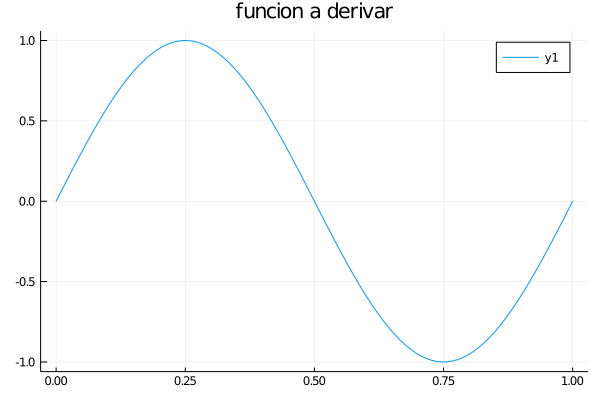

In [19]:
xs = range(0,stop=1,length=100)
ys = [primera(x) for x in xs]
plot(xs,ys,title="funcion a derivar")

Quiero implementar la aproximación
$$
f'(a) = \frac{f(a+h) - f(a)}{h}
$$


In [20]:
# esta función me calcula la derivada de f en un punto a usando la diferencia hacia adelante con un valor de h
function difAdelante(f,a,h)
    return (f(a+h) - f(a)) / h
end

difAdelante (generic function with 1 method)

Sabemos que 

$$
primera'(x) = (\sin{2\pi x})' = 2 \pi \cos{2 \pi x}
$$

Podemos comparar el resultado numérico con el analítico

In [22]:
# derivada analítica de la funcion `primera`
function dprimera(x)
    return 2*pi*cos(2*pi*x)
end

dprimera (generic function with 1 method)

In [25]:
println(difAdelante(primera,0,0.01))
println(dprimera(0))
# ver el error absoluto
println(abs(dprimera(0)-difAdelante(primera,0,0.01)))

6.279051952931337
6.283185307179586
0.004133354248248899


In [31]:
# cambiando el valor de $h$ la aproximación cambia
h = 0.001
println(difAdelante(primera,0,h))
println(dprimera(0))
# ver el error absoluto
println(abs(dprimera(0)-difAdelante(primera,0,h)))

6.283143965558951
6.283185307179586
4.134162063529345e-5


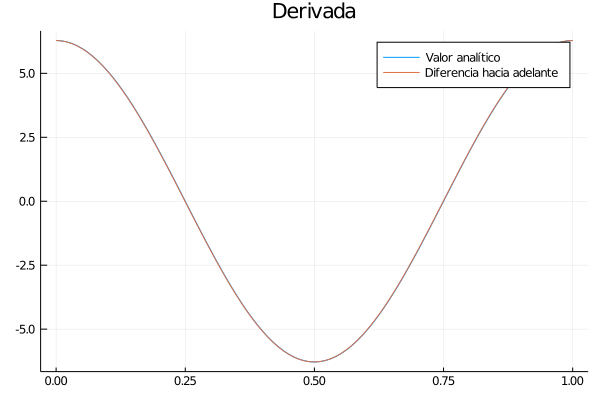

In [35]:
# ver la derivada como función
xs = range(0,stop=1,length=101)
ys1 = [dprimera(x) for x in xs]
h = 0.001
ys2 = [difAdelante(primera,x,h) for x in xs]
plot(xs,ys1,label="Valor analítico",title="Derivada")
plot!(xs,ys2,label="Diferencia hacia adelante")

## Ejercicios

1. Realiza una gráfica en la que compares la derivada analítica de la función $f(x) = \sin{x} \cdot \cos{x}$ con la obtenida por diferencia hacia adelante. Toma como dominio el intervalo $[-\pi,\pi]$

2. Para la función del inciso anterior, fija un valor de $x$, y gráfica, el error absoluto entre la derivada analítica y la numérica como función de $h$ ¿Qué observas? ¿Es lo esperado? Utiliza la escala log-log si es necesario.

#### ¿Qué otras aproximaciones hay?

### Segunda aproximación: diferencia hacia atrás (backwards difference)

Sea $h > 0$, $h << a$

$$
f(a-h) = f(a) + f'(a)(-h) + R_{1}(a-h)
$$

Despejo la derivada:

$$
f'(a) = \frac{f(a-h)-f(a)}{-h} - \frac{R_{1}(a-h)}{-h} = \frac{f(a)-f(a-h)}{h} + \frac{R_{1}(a-h)}{h}
$$


Obtenemos entonces:


$$
f'(a) \approx \frac{f(a)-f(a-h)}{h} 
$$

$$
\lim_{h \to 0} \frac{R_1(a-h)}{h} = 0
$$

## Ejercicios
3. Define una función llamada `diferenciaAtras(f,a,h)` que aproxime la derivada de $f$ en a, $f'(a)$, utilizando  una diferencia hacia atras de orden $h$

### Tercera aproximación: diferencia centrada (central difference)

Primero expandimos $f(a+h)$ y $f(a-h)$ en polinomio de taylor de orden 2:

$$
f(a+h) = f(a) + f'(a) h + \frac{f''(a)}{2!} h^2 + R_2 (a+h)
$$


$$
\begin{split}
f(a-h) &= f(a) + f'(a)(- h) + \frac{f''(a)}{2!} (-h)^2 + R_2 (a-h) \\
&= f(a) - f'(a)h + \frac{f''(a)}{2!} h^2 + R_2 (a-h)
\end{split}
$$

Podemos restar ambas aproximaciones:

$$
\begin{split}
f(a+h) - f(a-h) &= (f(a) - f(a)) + (f'(a)h - (-f'(a) h)) + (\frac{f''(a)}{2!} h^2 - \frac{f''(a)}{2!} h^2) +  (R_2(a+h) - R_2(a-h)) \\
 &=  2 f'(a) h + (R_2(a+h) - R_2(a-h))
\end{split}
$$

Despejo la derivada:

$$
f'(a) = \frac{f(a+h) - f(a-h)}{2h} - \frac{R_2(a+h) - R_2(a-h)}{2h} \approx \frac{f(a+h) - f(a-h)}{2h}
$$

$$
\lim_{h \to 0} \frac{R_2(a+h) - R_2(a-h)}{2h} = 0
$$

## Ejercicios:

4. Define una función llamada `diferenciaCentrada(f,a,h)` que aproxime la derivada de $f$ en a, $f'(a)$, utilizando  una diferencia centrada de orden $h$

Para las siguientes funciones, realiza dos gráficas: una en la que compares las derivadas obtenidas analíticamente, con diferencia hacia adelante, diferencia hacia atrás y diferencia centrada, Y  otra gráfica en la que analices el error absoluto como función de $h$ para un punto fijo. Puedes escoger el dominio de la primera gráfica

5. $f_1(x) = 10x^2 + 6x - 1$

6. $f_2(x) = \sin{\left( \cos{(6x+2)} \right)}$

7. $f_3(x) = 2^{x \cdot \sin{x}}$

In [ ]:
function ejer7(x)
    return 2^(x*sin(x))
end

In [ ]:
using Plots

In [ ]:
function difCentrada(f,a,h)
    return (f(a+h) - f(a-h))/(2*h)
end

## Derivadas de orden superior

Podemos seguir el mismo esquema para obtener aproximaciones de las derivadas de orden más grande. Esto no es un proceso simple, pero para orden 2 podemos hacerlo de manera muy sencilla.

## Ejercicios

8. Suma las expansiones en serie de taylor a orden 2 de $f(a+h)$ y $f(a-h) $ para obtener una expresión para la segunda derivada $f''(a)$. ¿Cuál es su error de aproximación?

9. Comprueba el error de aproximación obtenido al analizar el error absoluto en la segunda derivada de la función $\sin{(6x^2+1)}$ en un punto fijo del intervalo $[1,3]$

## Funciones multidimensionales


Podemos también utilizar diferencias finitas para aproximar las derivadas parciales de una función $f:\mathbb{R^n} \to \mathbb{R}$. Hacer expresiones de las derivadas de orden superior se vuelve complicado ya que hay que hacer expansiones de Taylor multidimensionales, pero para las primeras derivadas parciales basta recordar la definición

$$
\frac{\partial f}{\partial x_k} (a_1, \ldots, a_n) = \lim_{h \to 0} \frac{f(a_1, \ldots, a_k + h, \ldots, a_n) - f(a_1, \ldots, a_k, \ldots, a_n)}{h}
$$

## Ejercicios

10. Define una función `devParcial(f,i,A,h)`, donde $f:\mathbb{R^n} \to \mathbb{R}$ es una función multivariada, que toma como argumento un solo arreglo, $A$ es un arreglo de longitud $n$ e $1\leq i \leq n$ es un natural, que te regrese la derivdad parcial $\frac{\partial f}{\partial x_i} (A)$. Pruebala con alguna función de tu elección.

11. Sea $g:\mathbb{R}^2 \to \mathbb{R}$, obtén una expresión de diferencias finitas para la derivada curzada $\frac{\partial^2 g}{\partial x \partial y}$. ¿Cuál es el orden de su error?

## La visión general:

Existe una manera de derivar aproximaciones de diferencias finitas arbitrarias que sean $\mathcal{O}(h^p)$ para el $p \in \mathbb{N}$ que yo quiera. Ese método escapa al alcance del curso, pero lo pueden consultar en el libro de LeVeque.

Existe también una manera de calcular las derivadas de manera exacta, llamada **diferenciación automática**. No veremos ese tema pues requiere de conocimientos más avanzados de programación.